## The candi series uses the previously generated promising candidate molecules as training sets to retrain the model and generate molecules

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit import DataStructs
from utilities.candiconfig import CandiConfig
import os

config = CandiConfig()

In [2]:
def converter(file_name, smiles_format=0):
    smiles = []
    mols = [mol for mol in Chem.SDMolSupplier(file_name)]
    
    # smiles format when converting sdf into smiles, 0: default, 1: remove all the isomeric structures, i.e. isomericSmiles = False, 2: no @ characters
    if smiles_format == 0:
        for mol in mols:
            sm = Chem.MolToSmiles(mol)
            smiles.append(sm)
    elif smiles_format == 1:
        for mol in mols:
            sm = Chem.MolToSmiles(mol, isomericSmiles=False)
            smiles.append(sm)
    else:
        for mol in mols:
            sm = Chem.MolToSmiles(mol, isomericSmiles=False)
            sm = sm.replace('@','')
            smiles.append(sm)
    
    return smiles


def get_filelist(path, Filelist):
    newDir = path
    if os.path.isfile(path):
        Filelist.append(path)
    elif os.path.isdir(path):
        for s in os.listdir(path):
            newDir=os.path.join(path,s)
            get_filelist(newDir, Filelist)
            
    return Filelist


In [3]:
file_list = []
file_list = get_filelist(config.LA_sdf_path, file_list)

In [6]:
smile_list = []

for file in file_list:
    if file is not None:
        try:
            m = converter(file, config.smiles_format)
            if m[0] not in smile_list:
                smile_list.append(m[0])
        except:
            print(file)
            
# 删除成盐类分子
with open(config.LA_smiles_file_old, 'w', encoding='utf-8') as f:
    for smile in smile_list:
        if '+' in smile:
            print(smile)
            continue
        f.write(smile+'\n')
        
print("there are "+ str(len(smile_list)) + " smile molecules in total!")

Cc1ccc(CNc2c(NC[n+]3ccccc3)c(=O)c2=O)c(N(C)C)c1
Cc1cc[n+](CNC(=O)NCc2ccsc2)cc1N(C)C
Cc1ccc(CNC(=C[N+](=O)[O-])NCc2ccsc2)c(N(C)C)c1
Cc1cc[n+](CNC(=O)NCc2ccsc2)c(N(C)C)c1
Cc1ccc(CNC(=O)NC[n+]2ccccc2)c(N(C)C)c1
there are 186 smile molecules in total!


In [8]:
smile_list

['Cc1ccc(CNc2c(NC[n+]3ccccc3)c(=O)c2=O)c(N(C)C)c1',
 'COC(=O)c1csc(C(C)NC(=O)NCc2cc(N(C)C)c(O)c(N(C)C)c2)c1',
 'O=C(Cc1c[nH]cn1)Nc1c(CO)cccc1Oc1ccccc1',
 'COC(=O)c1cc(C(C)NC(=O)NCc2cc(N(C)C)c(O)c(N(C)C)c2)cs1',
 'CC(NC(=O)NCc1cc(N(C)C)c(O)c(N(C)C)c1)c1cccs1',
 'COC(=O)c1ccc(C(C)OC(=O)OCc2cc(N(C)C)c(O)c(N(C)C)c2)s1',
 'COC(=O)c1cc(CNC(=O)NCc2ccc(C)cc2N(C)C)cs1',
 'CN(C)c1cc(CCNC(=O)C2COC2)ccc1CNC(=O)NCc1ccsc1',
 'CCCC(C(=O)Nc1c(N)cccc1Oc1ccccc1)c1c[nH]cn1',
 'CNC(C)=NCCc1ccc(CNC(=O)NCc2ccsc2)c(N(C)C)c1',
 'COC(=O)c1csc(C(O)OC(=O)OCc2cc(N(C)C)c(O)c(N(C)C)c2)c1',
 'Nc1cccc(Oc2ccccc2)c1NC(=O)C(N)c1c[nH]cn1',
 'COC(=O)c1cscc1C(C)OC(=O)OCc1cc(N(C)C)c(O)c(N(C)C)c1',
 'Nc1ccc(Oc2ccccc2)c(NC(=O)Cc2c[nH]cn2)c1',
 'CC(C)C(C(=O)Nc1c(N)cccc1Oc1ccccc1)c1c[nH]cn1',
 'Nc1cccc(Oc2ccccc2)c1NC(=O)Cc1c[nH]cn1',
 'CC(OC(=O)OCc1cc(N(C)C)c(O)c(N(C)C)c1)c1ccsc1',
 'Cc1ccc(CNC(=O)NCc2ccccc2)c(N(C)C)c1',
 'Cc1cc[n+](CNC(=O)NCc2ccsc2)cc1N(C)C',
 'COC(=O)c1ccsc1C(N)OC(=O)OCc1cc(N(C)C)c(O)c(N(C)C)c1',
 'Cc1ccc(CNC

### revise some smiles molecules with unwanted characters

In [9]:
revised_sdf_file = './dataset/LA/revised_sdf/38.sdf'
converter(revised_sdf_file, config.smiles_format)

OSError: File error: Bad input file ./dataset/LA/revised_sdf/38.sdf

### get the smiles from candidate file 2021-11-01


In [3]:
# get the smiles from sdf file
filename = "./dataset/Mol-screening-syn.sdf"

smiles = converter(filename)

In [4]:
# rate the SA 
from moses.metrics import SA
from moses.metrics.utils import get_mol
import pandas as pd
from rdkit.Chem import PandasTools

In [5]:
output_file = "./dataset/Mol-screening-output.sdf"
mol_pd = pd.DataFrame(columns=['No', 'Smiles','SA'])

for i,sm in enumerate(smiles):
    mol = get_mol(sm)
    mol_pd.loc[i] = {'No':(i+1),'Smiles':sm,'SA':SA(mol)}

In [6]:
PandasTools.AddMoleculeColumnToFrame(mol_pd,'Smiles','Molecule')

In [7]:
PandasTools.WriteSDF(mol_pd, output_file, molColName='Molecule', properties=list(mol_pd.columns))

,No,Smiles,SA,Molecule
0,1,COC(=O)[NH+]1CCN(C(=O)Nc2ccccc2)CC1,3.273639,
1,2,COC(=O)[NH+]1CCN(C(=O)Nc2ccncc2)CC1,3.548652,
2,3,CC(=O)Nc1cc(C(=O)C2CCN(c3ccco3)CC2c2ccco2)cc[n...,4.396522,
3,4,Cc1cc([NH3+])cc(C)c1NC(=O)N1CCC(C[C@H](O)CO)C(...,4.018712,
4,5,CC(=O)Oc1cc([NH3+])cc(C)c1N1CCN(CC(O)CO)C(=O)C1,3.813326,
5,6,CCC(=O)N(C)C1CC(C(=O)OC)CCN1CCc1cccs1,3.514645,
6,7,COC(=O)C1CCN(CCc2cccs2)C(N(C)C)C1,3.425226,
7,8,CCC(=O)N(C)C1CC(C(=O)OC)CCN1CCCCCc1cccs1,3.487561,
8,9,CCON(c1ccccc1)C1CC(C(=O)OC)CCN1CCc1cccs1,3.623823,
9,10,Cc1ccc(CNC(=O)NCc2ccsc2)c(N(C)C)c1,2.246593,

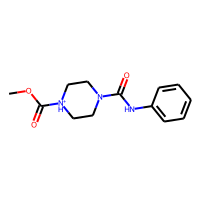
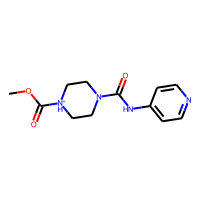
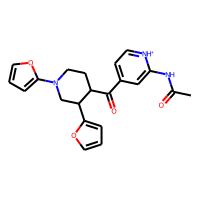
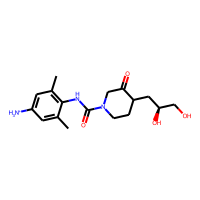
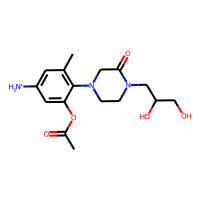
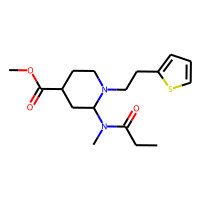
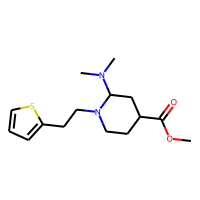
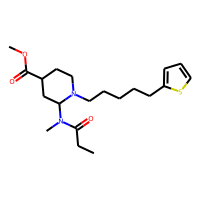
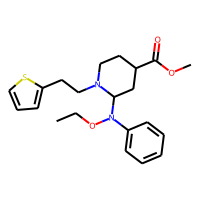
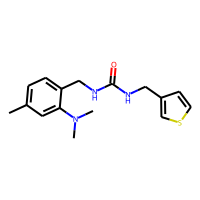
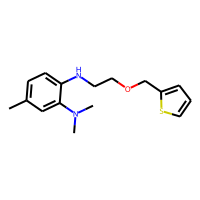
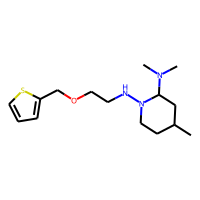
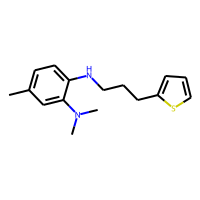
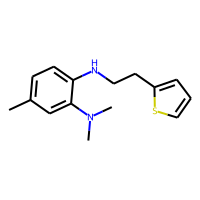
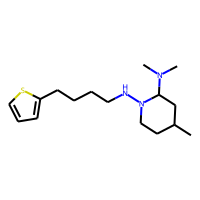
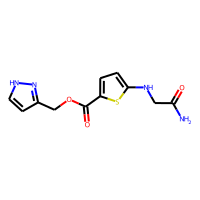
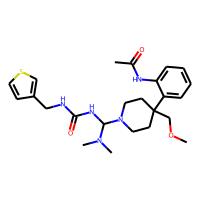
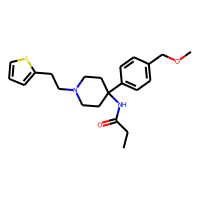
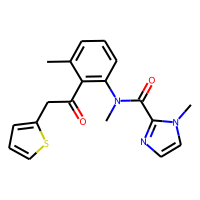
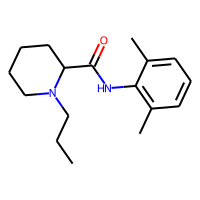
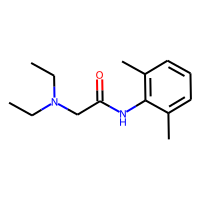
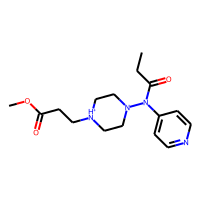

In [8]:
mol_pd

## get the SA score from sdf file, date: 2021-11-22

In [2]:
from moses.metrics import SA
from moses.metrics.utils import get_mol
from rdkit import Chem
from rdkit.Chem import Draw

In [5]:
files = ["./1015-2109039862.sdf", "./1018-21090312937.sdf","./1015-2109035671GAI2.sdf"]

In [21]:
smiles_list = [converter(f)[0] for f in files]
mols = [get_mol(s) for s in smiles_list]

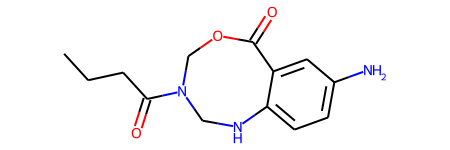

In [9]:
mols[0]

In [10]:
SA(mols[0])

2.938529349910585

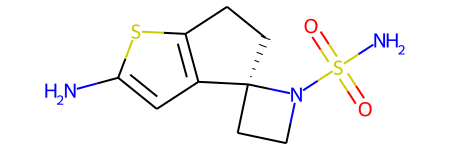

In [11]:
mols[1]

In [12]:
SA(mols[1])

4.663471750054183

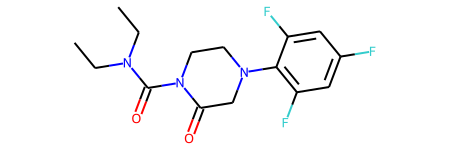

In [13]:
mols[2]

In [22]:
SA(mols[2])

3.0112020830940134

### Tests generated directly from mol

In [24]:
mols_list = [Chem.SDMolSupplier(f) for f in files]

sas2 = [SA(m[0]) for m in mols_list]


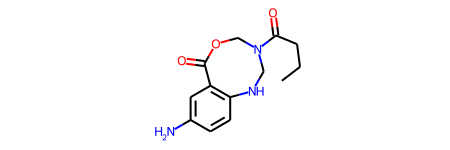

In [26]:
mols_list[0][0]

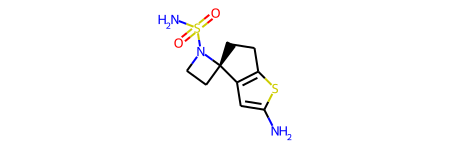

In [27]:
mols_list[1][0]

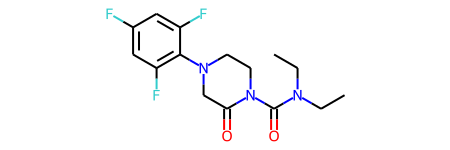

In [28]:
mols_list[2][0]